# Effects of different features on the bank loans system

What factors affect a loan’s outcome status?

What affects the borrower’s APR or interest rate?

Are there differences between loans depending on how large the original loan amount was?


## Investigation Overview

In this investigation, I wanted to look at the different features that could be used to predict their acceptance and rejection of new loans. The main focus was on the loan assesment, interest rates, and Loan amounts.

## Dataset Overview

The data consisted of outcomes and attributes of approximately 113,937 different loans.

The attributes included the occupation, dates of loans, as well as addittional measurements like interest rates,and risk factors. We focus our investigation on the new system of assesment after 2009, so we filtered based on that.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# convert CreditGrade, color, and clarity into ordered categorical types
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'LoanStatus': ['Chargedoff', 'Cancelled',  'Current', 'Defaulted', 'Past Due (1-15 days)',  
 'Past Due (16-30 days)' , 'Past Due (31-60 days)', 'Past Due (61-90 days)',
  'Past Due (91-120 days)', 'Past Due (>120 days)','FinalPaymentInProgress', 'Completed'],
                    'ProsperRating (Alpha)': [ 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'EmploymentStatus': [ 'Not available', 'Other', 'Not employed','Retired',  'Part-time', 'Employed', 'Full-time'],
                    'IncomeRange': ['Not displayed', '$0','Not employed', '$1-24,999','$25,000-49,999',  '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'ProsperRating (Alpha)': [ 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'LoanOriginationQuarter': [ 'Q4 2005', 'Q3 2006', 'Q4 2006', 'Q2 2006', 'Q1 2006', 'Q3 2007', 'Q1 2007', 'Q4 2007', 'Q2 2007', 'Q3 2008', 'Q1 2008', 'Q2 2008', 'Q4 2008', 'Q3 2009', 'Q4 2009', 'Q2 2009', 'Q2 2010', 'Q4 2010', 'Q1 2010', 'Q3 2010', 'Q4 2011', 'Q2 2011', 'Q1 2011', 'Q3 2011', 'Q4 2012', 'Q2 2012', 'Q1 2012', 'Q3 2012', 'Q3 2013', 'Q4 2013', 'Q2 2013', 'Q1 2013', 'Q1 2014']
                                              }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

## Distribution of amount of loans

Amount of loans are right skewed with some peaks in the 5k multipactives like (5k, 10k, 15k, 20k, 25k)



In [4]:
# We add here a column that define the Loan outcomes in a simpler way just to easier understand our results.

df['loan_asses'] = df['LoanStatus'].replace({'Completed': 'successfull', 'FinalPaymentInProgress': 'successfull' ,  'Chargedoff': 'risky' , 'Defaulted': 'risky' ,
                                            'Past Due (1-15 days)': 'risky'  , 'Past Due (91-120 days)': 'risky', 'cancelled':'risky', 
                                           '(Past Due (31-60 days)': 'risky','Past Due (61-90 days)': 'risky', 'Past Due (16-30 days)': 'risky',
                                            'Past Due (>120 days)': 'risky', 'FinalPaymentInProgress' : 'successfull', 'Past Due (31-60 days)': 'risky', 
                                           'Cancelled': 'risky', 'Current':'Current'})

df_status = df[df['loan_asses'].isin(['successfull', 'risky', 'Current'])].copy()

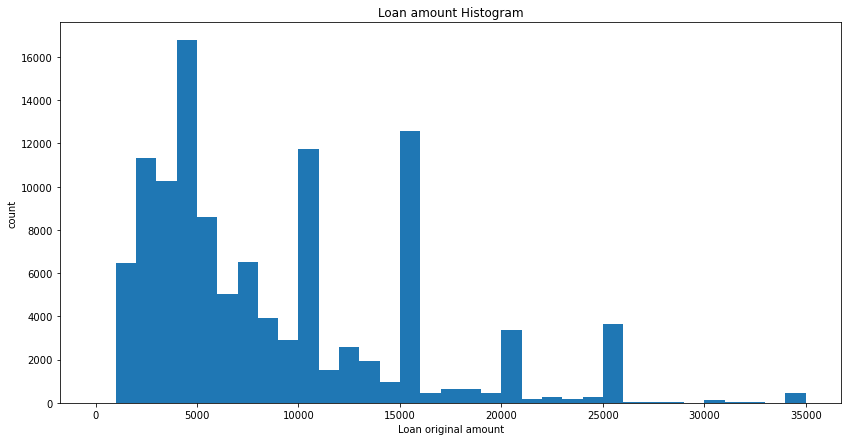

In [5]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,7])
# Use the `color` argument
bins = np.arange(0, df_status['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df_status, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan original amount')
plt.ylabel('count')
plt.title('Loan amount Histogram');


## Distribution of status of loans

Loans are classified into many classifications, we made a distribution to show how is it classified according to the counts of classifications.

Then we made the classification simpler to be visually more appealing to comperhend.


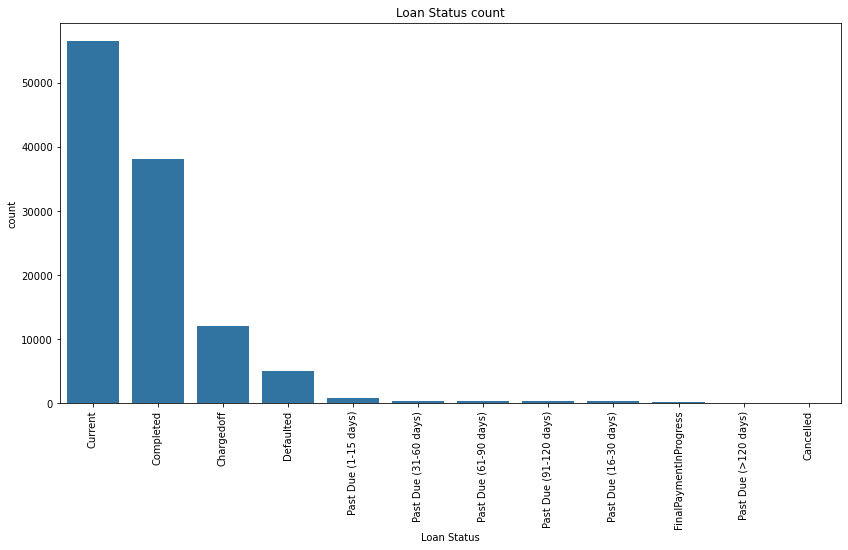

In [6]:
# start with a standard-scaled plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,7])
# Use the `color` argument
sb.countplot(data=df_status, x='LoanStatus', color=base_color, order =df_status['LoanStatus'].value_counts(normalize=True).index );
plt.xticks(rotation =90);
plt.xlabel('Loan Status')
plt.title('Loan Status count');
plt.show()

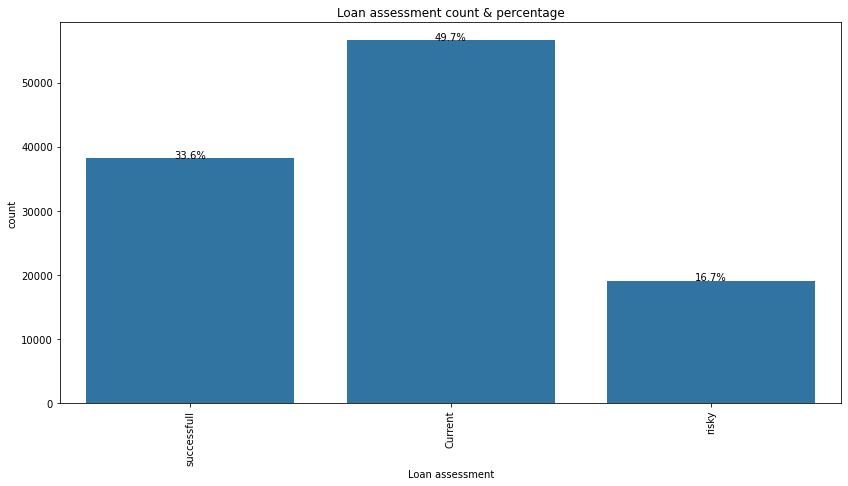

In [20]:
n_assess = df_status['loan_asses'].value_counts().sum()
type_counts = df_status['loan_asses'].value_counts()

# Return the highest frequency in the `type` column
max_type_count = type_counts[0]
plt.figure(figsize=[14,7])
# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_assess

base_color = sb.color_palette()[0]

sb.countplot(data=df_status, x='loan_asses', color=base_color);
plt.xlabel('Loan assessment')
plt.title('Loan assessment count & percentage');
type_counts = df_status['loan_asses'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_assess)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

## Employment Status & Time vs. Loan assesment

Investigation if Employment status is having a strong relationship with the probability of success of a loan for the bank, what was noted here is that part timers having a higher success rate than full timers.

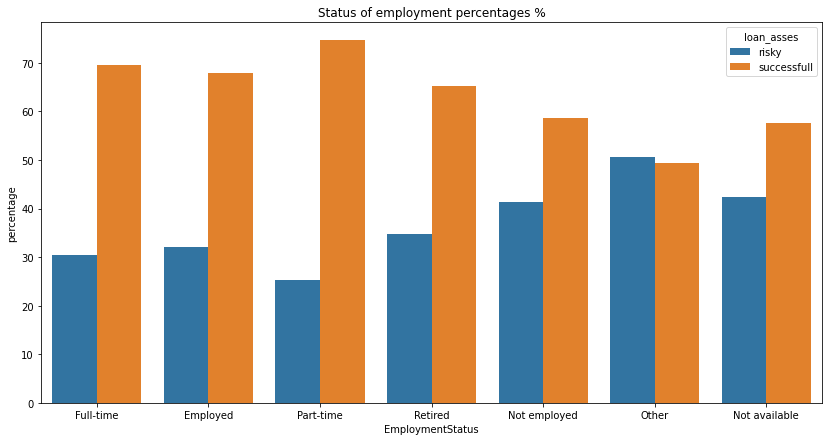

In [19]:
#we remove the current count as it is not an indicator and will cause noise to our illustratation.
df_status2 = df_status[df_status['loan_asses'].isin(['risky','successfull'])]

#Now we produce a bivariate histogram for Employment Status with hue of Loan_asses.

plt.figure(figsize = [14,7])
Employement_counts = (df_status2.groupby(['EmploymentStatus'])['loan_asses']
                      .value_counts(normalize=True, sort=False).rename('percentage')
                      .mul(100).reset_index().sort_values('EmploymentStatus'))
sb.barplot(x="EmploymentStatus", y="percentage", hue="loan_asses", data=Employement_counts, order =Employement_counts.EmploymentStatus.value_counts().index );
plt.title('Status of employment percentages %');

In [9]:
Quarter_order = ['Q4 2005', 'Q1 2006', 'Q2 2006', 
             'Q3 2006', 'Q4 2006', 'Q1 2007', 'Q2 2007', 'Q3 2007', 
             'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008',
             'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q1 2010', 'Q2 2010',
             'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011', 'Q3 2011', 
            'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012', 'Q1 2013', 
              'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']

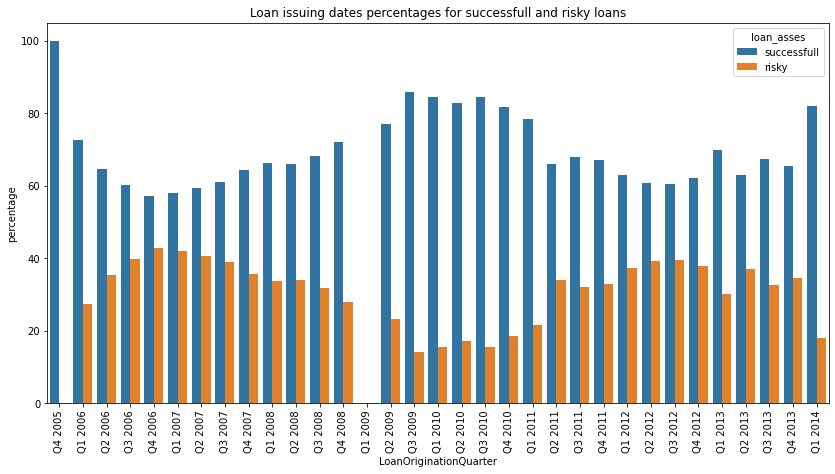

In [21]:
#Now we produce a bivariate histogram for Employment Status with hue of Loan_asses.

plt.figure(figsize = [14,7])
Employement_counts = (df_status2.groupby(['LoanOriginationQuarter'])['loan_asses']
                      .value_counts( normalize= True,sort=False).rename('percentage')
                      .mul(100).reset_index().sort_values('LoanOriginationQuarter'))
sb.barplot(x="LoanOriginationQuarter", y="percentage", hue="loan_asses", data=Employement_counts, order =Quarter_order )
plt.xticks(rotation = 90);
plt.title('Loan issuing dates percentages for successfull and risky loans');

## Question number 1 : What factors affect a loan’s outcome status?

## Loan outcome vs predicting factors

#### **Main factors affecting loan outcomes here are :** 
  
 - **Loan Months Since Origination**  : The longer Months can decrease the interest rate on the loan, as it is an indication of a low risk client.
 
 - **LP Customer Principal Payments** : The more payments value can decrease the risk of the outcome on the loan, as it is an indication of a low risk client.
 - **Loan Original Amount** : The Loan amount has  an effect on the loan outcome.

In [11]:
# This function should remove highly correlated descriptors(columns) from any dataset with specified correlation threshold
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold or corr_matrix.iloc[i, j] <= -threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
org_af_09 = df_status[df_status['ProsperScore'].notna()].iloc[:]
categ = ['ListingKey', 'BorrowerState', 'Occupation', 'GroupKey', 'LoanKey',
       'MemberKey', 'loan_asses']
for cat in categ:     
    org_af_09[cat] = org_af_09[cat].astype(str)
    org_af_09[cat] = le.fit_transform(org_af_09[cat])

Index(['loan_asses', 'LoanMonthsSinceOrigination',
       'LP_CustomerPrincipalPayments', 'LoanOriginalAmount', 'Term',
       'EstimatedReturn', 'Investors', 'ProsperPrincipalOutstanding'],
      dtype='object')


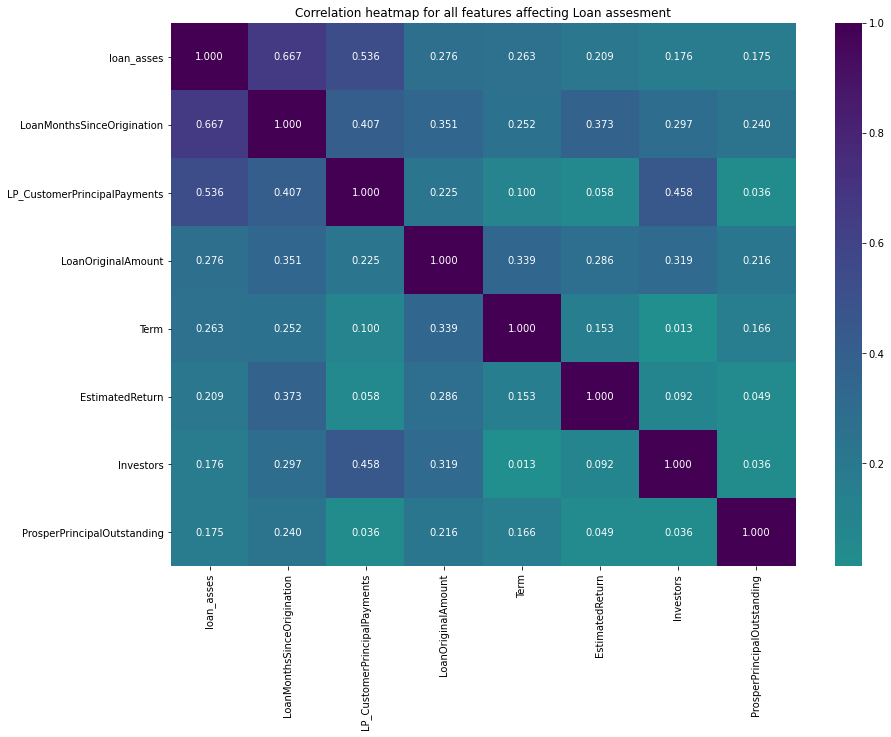

In [23]:
# main factors affecting Loan assesment after 2009
# We make a list of the top 12 highest (absolute) factors affecting Loan assesment

loan_corr_abs = list(abs(org_af_09.corr()['loan_asses'][:]).nlargest(12).index)

loan_corr = org_af_09[loan_corr_abs]

correlation(loan_corr, 0.8)
plt.figure(figsize = [14, 10])
sb.heatmap(abs(loan_corr.corr()), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation heatmap for all features affecting Loan assesment');
plt.show();


### Question number 2 : What affects the borrower’s APR or interest rate?

#### **Main factors affecting interest rate here are :** 
  
 - **ProsperScore**  : The more score can decrease the interest rate on the loan, as it is an indication of a low risk client.
 
 - **credit score range** : The more score can decrease the interest rate on the loan, as it is an indication of a low risk client.
 - **Available Bank card credit** : The total available credit via bank card can have an effect on the interest rate given by bank.

Index(['BorrowerAPR', 'EstimatedReturn', 'InquiriesLast6Months',
       'BankcardUtilization', 'LoanMonthsSinceOrigination',
       'LP_InterestandFees', 'ProsperScore', 'CreditScoreRangeLower',
       'LoanOriginalAmount', 'AvailableBankcardCredit',
       'TradesNeverDelinquent (percentage)'],
      dtype='object')


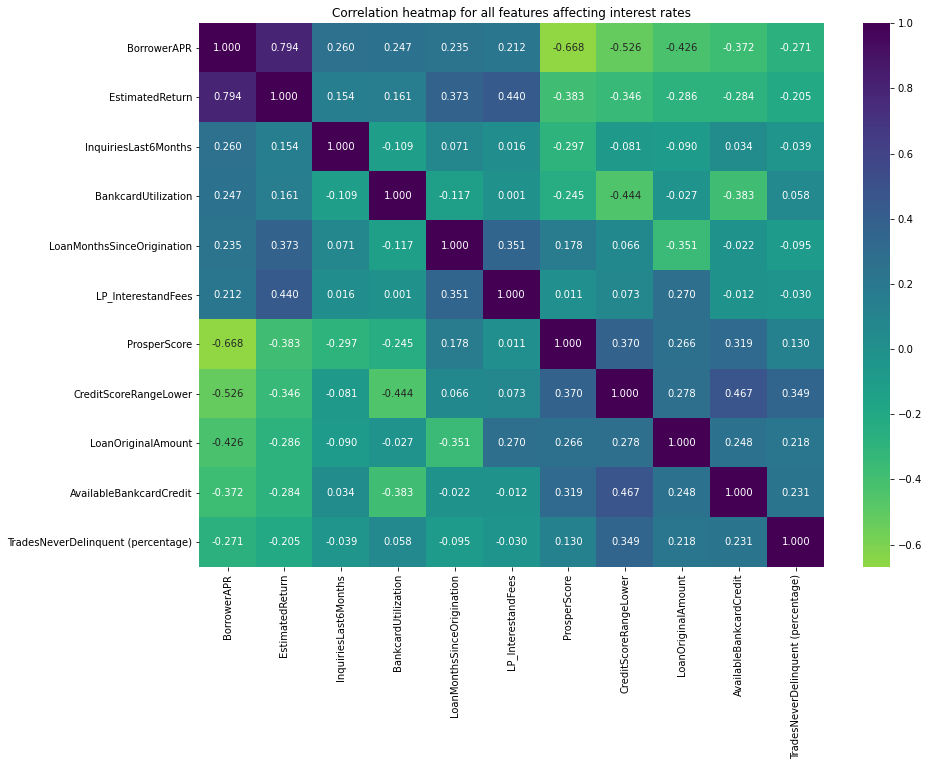

In [22]:
APR_corr = list(org_af_09.corr()['BorrowerAPR'][:].nlargest(10).index)+ list(org_af_09.corr()['BorrowerAPR'][:].nsmallest(10).index)

APR_correlate = org_af_09[APR_corr]

correlation(APR_correlate, 0.8)
plt.figure(figsize = [14, 10])
sb.heatmap(APR_correlate.corr(), annot = True, fmt = '.3f', 
           cmap = 'viridis_r', center = 0)
plt.title('Correlation heatmap for all features affecting interest rates');

plt.show();

#### **Further investigation into these features :** 

This plot suggests from the direct relationship between the increasing rate of interest and estimated yield.

trend. There also appears to be an affecting factor here which is the prosper rating given to borrower in the data.

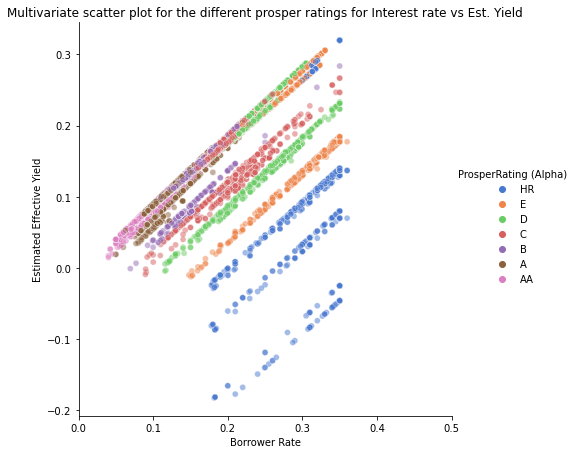

In [24]:
# scatter plot of BorrowerRate vs. Estimated Effective Yield

sb.relplot(x="BorrowerRate", y="EstimatedEffectiveYield", hue="ProsperRating (Alpha)", 
            sizes=(80, 200), alpha=.5, palette="muted",
            height=6, data=org_af_09)
plt.xlim([0, .5])
plt.xlabel('Borrower Rate')

plt.ylabel('Estimated Effective Yield')
plt.title('Multivariate scatter plot for the different prosper ratings for Interest rate vs Est. Yield');

plt.show()

### Question number 3 : to see if  there are differences between loans depending on how large the original loan amount was?

####  **Main factors affecting original loan amounts here are :** 
  
 - **ProsperRating (numeric)**  : The more score can decrease the interest rate on the loan, as it is an indication of a low risk client.
 
 - **ProsperPrincipalBorrowed** : The more score can decrease the interest rate on the loan, as it is an indication of a low risk client.
 - **LoanNumber** : The total available credit via bank card can have an effect on the interest rate given by bank.



Index(['LoanOriginalAmount', 'ProsperRating (numeric)',
       'ProsperPrincipalBorrowed', 'LoanNumber', 'Term', 'Investors',
       'CreditScoreRangeLower', 'LP_ServiceFees', 'EstimatedReturn',
       'loan_asses', 'ListingCategory (numeric)'],
      dtype='object')


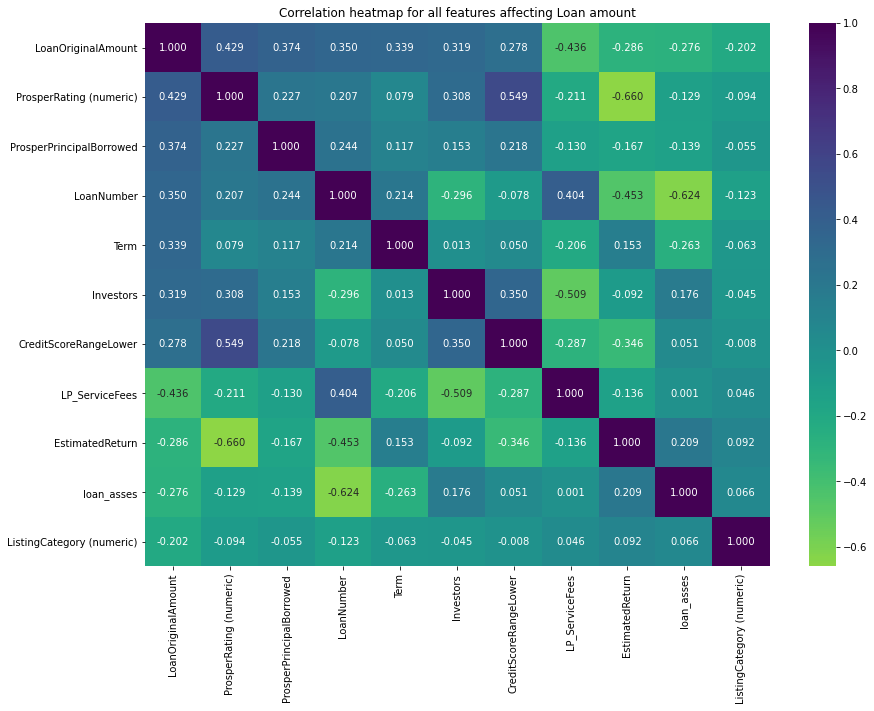

In [25]:
Loan_Amount_corr = list(org_af_09.corr()['LoanOriginalAmount'][:].nlargest(10).index)+ list(org_af_09.corr()['LoanOriginalAmount'][:].nsmallest(10).index)

Loan_Amount_correlate = org_af_09[['LoanOriginalAmount', 'ProsperRating (numeric)',
       'ProsperPrincipalBorrowed', 'LoanNumber', 'Term', 'Investors',
       'CreditScoreRangeLower', 'LP_ServiceFees', 'EstimatedReturn',
       'loan_asses', 'ListingCategory (numeric)']]

correlation(Loan_Amount_correlate, 0.8)
plt.figure(figsize = [14, 10])
sb.heatmap(Loan_Amount_correlate.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation heatmap for all features affecting Loan amount');

plt.show();

#### **Further investigation Listing category vs Loan amount :** 

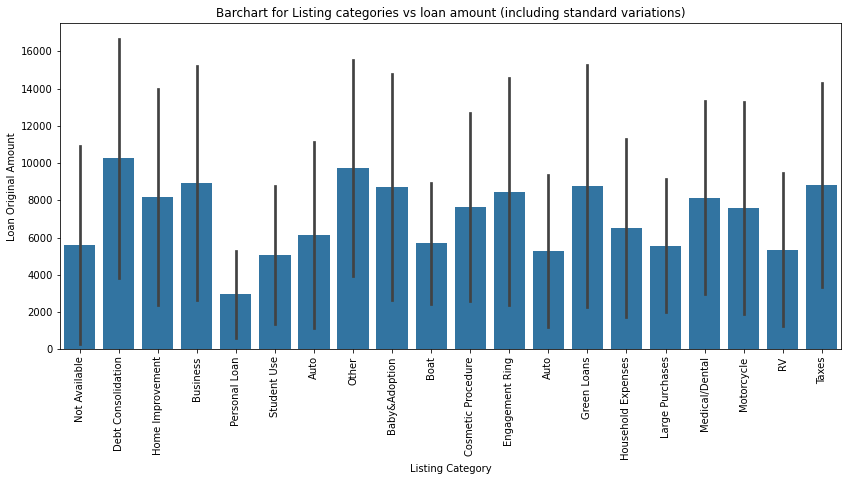

In [26]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[14,6])
sb.barplot(data=Loan_Amount_correlate, x='ListingCategory (numeric)', y='LoanOriginalAmount', color=base_color, ci='sd')
plt.xticks(rotation=90);
plt.xlabel('Listing Category')
plt.ylabel('Loan Original Amount');
plt.xticks(np.arange(20), ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Auto', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV','Taxes']) ;
plt.title('Barchart for Listing categories vs loan amount (including standard variations)');


## Relationship between different features and each other

Reproducing plot matrix of numeric features against categorical features, to see the different relationships between each other.


<Figure size 1008x1008 with 0 Axes>

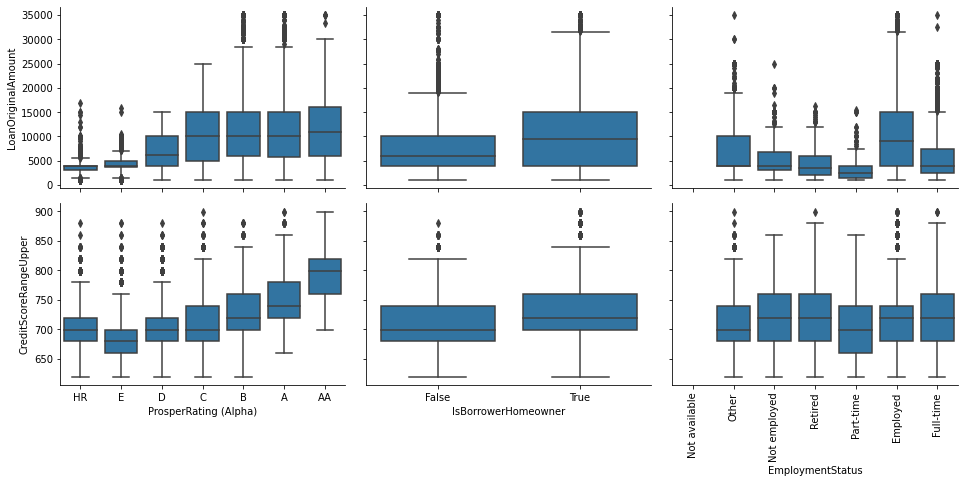

In [30]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
categoric_vars = ['ProsperRating (Alpha)', 'IsBorrowerHomeowner','EmploymentStatus' ]
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [14, 14])

g = sb.PairGrid(data = org_af_09, y_vars = ['LoanOriginalAmount', 'CreditScoreRangeUpper'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
plt.xticks(rotation = 90)
g.map(boxgrid)


plt.show();
